DATA COLLECTION

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
crop_dataset = pd.read_csv('/content/Crop_recommendation.csv')

In [3]:
crop_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


DATA ANALYSIS

In [4]:
#Check for missing values
crop_dataset.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [5]:
#Label Binarization i.e, naming label values with unique numeric value
crop_dataset_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop_dataset['label'] = crop_dataset['label'].map(crop_dataset_dict)

In [6]:
crop_dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [7]:
#Check Label value distributiion
crop_dataset['label'].value_counts()

,count
label,
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


In [8]:
#Statistical Analysis
crop_dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,11.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,1.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,6.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,11.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,17.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,22.000000


<ipython-input-9-14967439bf91>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_dataset['P'])


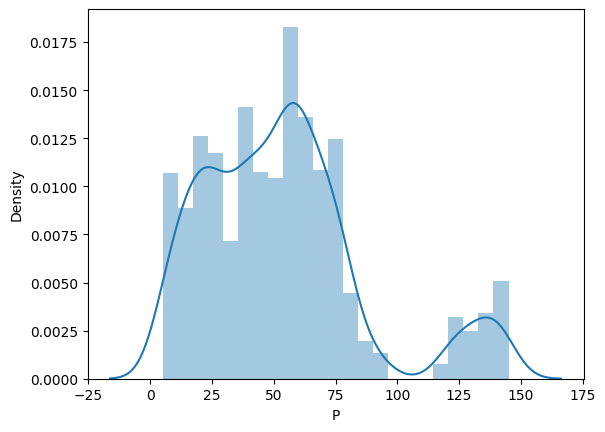

In [9]:
#Visualising value distribution
sns.distplot(crop_dataset['P'])
plt.show()

<ipython-input-10-0d33a71edab8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop_dataset['N'])


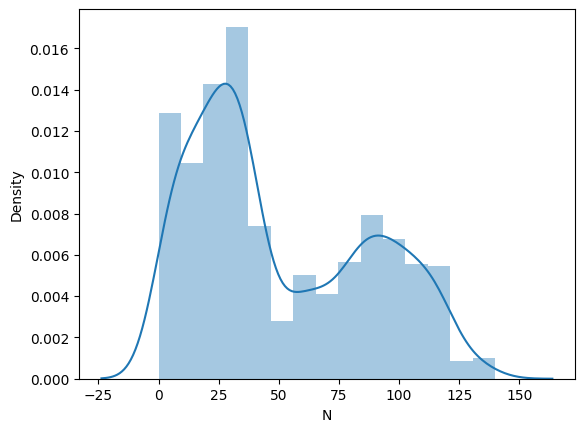

In [10]:
sns.distplot(crop_dataset['N'])
plt.show()

<Axes: >

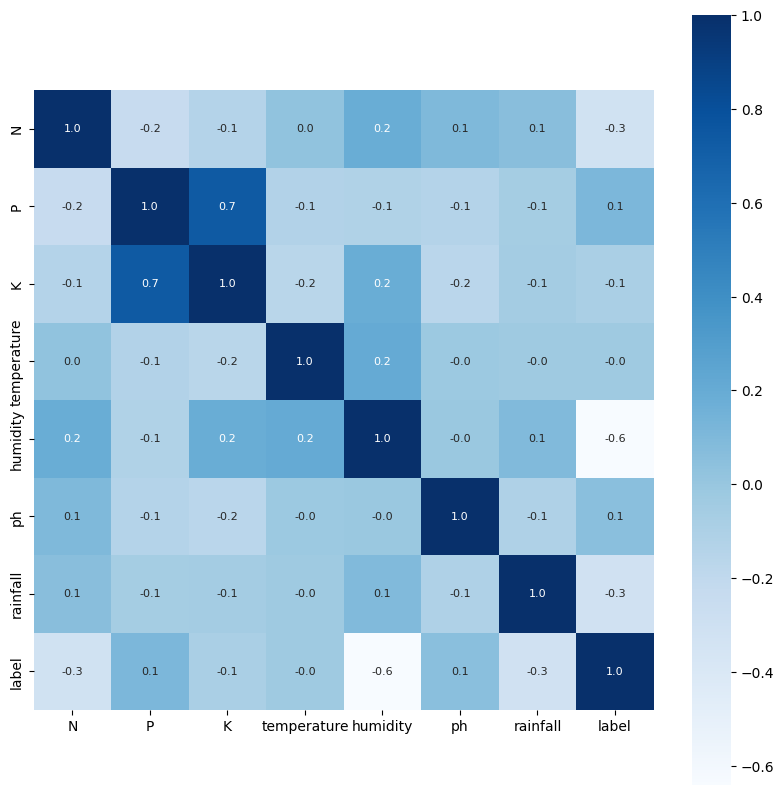

In [11]:
#Construct a heatmap to understand the correlation between the parameters
correlation = crop_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

DATA PREPROCESSING

In [12]:
#Separating Label value from the other columns
X = crop_dataset.drop('label', axis=1)
Y = crop_dataset['label']

In [13]:
print(X)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


In [14]:
print(Y)

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: label, Length: 2200, dtype: int64


DATA STANDARDIZATION

In [15]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
print(standardized_data)

[[ 1.0687974  -0.34455075 -0.1016875  ...  0.47266646  0.04330173
   1.8103605 ]
 [ 0.93332887  0.14061552 -0.14118477 ...  0.39705125  0.73487256
   2.24205791]
 [ 0.25598625  0.04964684 -0.08193887 ...  0.48695381  1.77151047
   2.92106603]
 ...
 [ 1.82742114 -0.61745677 -0.35841972 ... -0.19123516 -0.13812031
   1.27141766]
 [ 1.80032743 -0.64777967 -0.27942519 ... -0.86951801  0.37390383
   0.43154519]
 [ 1.44810927 -1.07230015 -0.35841972 ... -0.49802006  0.40109573
   0.68200518]]


In [16]:
X = standardized_data
Y = crop_dataset['label']

TRAIN/TEST SPLIT

In [17]:
#Split the data into four variables i.e., X,Y for training and X,Y for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

MODEL TRAINING: RANDOM FOREST CLASSIFIER

In [18]:
model = RandomForestClassifier()

In [19]:
#Fit the data and label columns into the model
model.fit(X_train, Y_train)

RandomForestClassifier()

MODEL EVALUATION

In [20]:
#Evaluate the accuracy scores of the model
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.9954545454545455

RECOMMENDATION SYSTEM BUILDING

In [21]:
#Taking inputs from the user
def get_user_input():
  N = float(input("Enter the ratio of Nitrogen content in the soil: "))
  P = float(input("Enter the ratio of Phosphorus content in the soil: "))
  K = float(input("Enter the ratio of Potassium content in the soil: "))
  temp = round(float(input("Enter The temperature in Celsius degrees: ")), 2)
  humidity = round(float(input("Enter the Humidity in percentage: ")), 2)
  pH = round(float(input("Enter the pH value of the soil: ")), 2)
  rainfall = round(float(input("Enter the amount of rainfall in mm: ")), 2)

  input_data = [N, P, K, temp, humidity, pH, rainfall]
  return input_data

input_data = get_user_input()

#Changing the data into a numpy array
numpy_array = np.asarray(input_data)

#Reshape the array
reshaped_data = numpy_array.reshape(1,-1)

#Standardize the data
std_data = scaler.transform(reshaped_data)

#Map numerical value to crop name
reverse_crop_dict = {v: k for k, v in crop_dataset_dict.items()}
predicted_crop = reverse_crop_dict[model.predict(std_data)[0]]

print(f"Recommended Crop for farming: {predicted_crop}")

Enter the ratio of Nitrogen content in the soil: 90
Enter the ratio of Phosphorus content in the soil: 42
Enter the ratio of Potassium content in the soil: 43
Enter The temperature in Celsius degrees: 20.87974371
Enter the Humidity in percentage: 82.00274423
Enter the pH value of the soil: 6.502985292000001
Enter the amount of rainfall in mm: 202.9355362
Recommended Crop for farming: rice


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
